In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import colors

In [111]:
df = pd.read_csv('../datasets/bike.csv')
corr = df.corr()
abs_corr = np.abs(corr)
columns = df.columns
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Metrics

In [112]:
def get_values(df, columns):
    index = ['min', 'max', 'mean', 'std', 'minN', 'maxN', 'Q1', 'Q2 (median)', 'Q3', 'IRQ']
    n_cols = len(columns)
    m = len(index)
    values = np.zeros((m,n_cols))

    for i,column in enumerate(columns):
        if column == 'dteday': continue
        values[0,i] = np.min( df[column].values  )
        values[1,i] = np.max( df[column].values  )
        values[2,i] = np.mean( df[column].values  )
        values[3,i] = np.std( df[column].values  )
        values[4,i] = np.percentile( df[column].values, 25 )
        values[5,i] = np.percentile( df[column].values, 50 )
        values[6,i] = np.percentile( df[column].values, 75 )
        values[7,i] = values[6,i]-values[4,i]
        values[8,i] = values[4,i] - 1.5*values[7,i]
        values[9,i] = values[6,i] + 1.5*values[7,i]

    df_values = pd.DataFrame(values,columns=columns,index=index)
    return df_values

get_values(df, columns)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
min,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
max,731.000000,0.0,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
mean,366.000000,0.0,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.021326,0.0,1.110047,0.500000,3.449551,0.167040,2.003415,0.464915,0.544522,0.182926,0.162850,0.142332,0.077445,686.152682,1559.188805,1935.885956
minN,183.500000,0.0,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
maxN,366.000000,0.0,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
Q1,548.500000,0.0,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
Q2 (median),365.000000,0.0,1.000000,1.000000,6.000000,0.000000,4.000000,1.000000,1.000000,0.318333,0.270760,0.210209,0.098265,780.500000,2279.500000,2804.000000
Q3,-364.000000,0.0,0.500000,-1.500000,-5.000000,0.000000,-5.000000,-1.500000,-0.500000,-0.140416,-0.068297,0.204687,-0.012447,-855.250000,-922.250000,-1054.000000
IRQ,1096.000000,0.0,4.500000,2.500000,19.000000,0.000000,11.000000,2.500000,3.500000,1.132916,1.014741,1.045521,0.380611,2266.750000,8195.750000,10162.000000


# Histogramas y boxplot

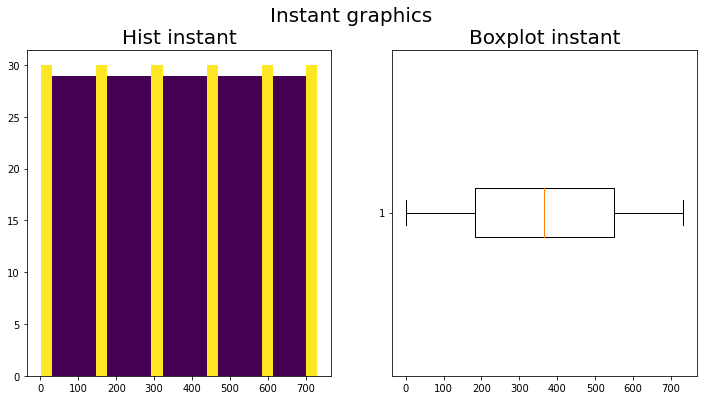

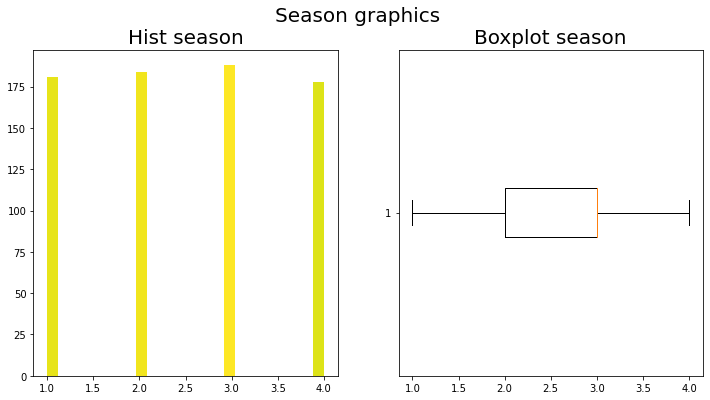

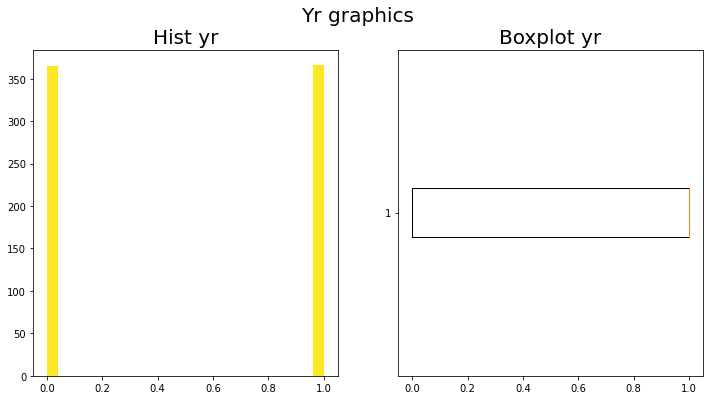

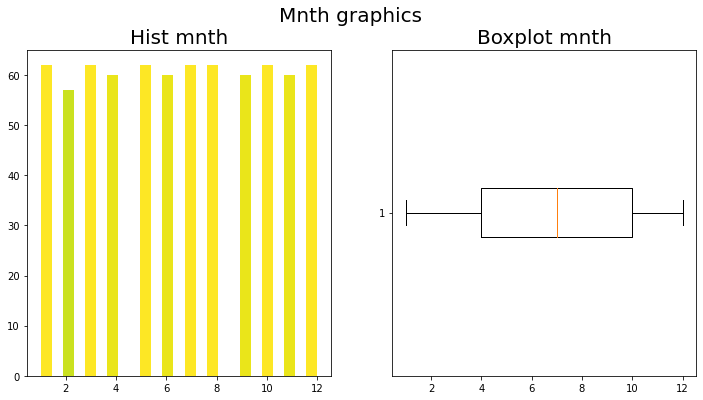

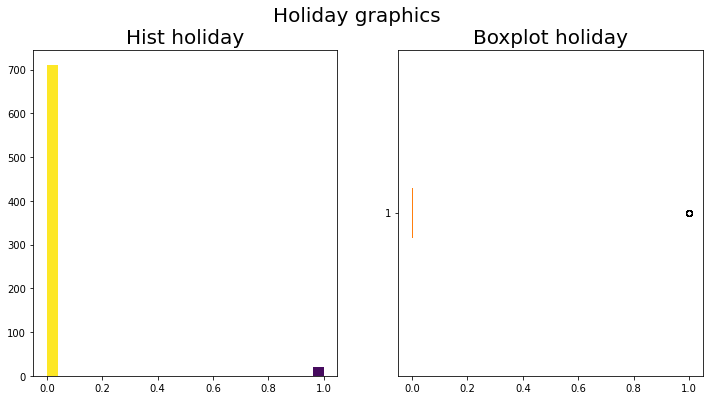

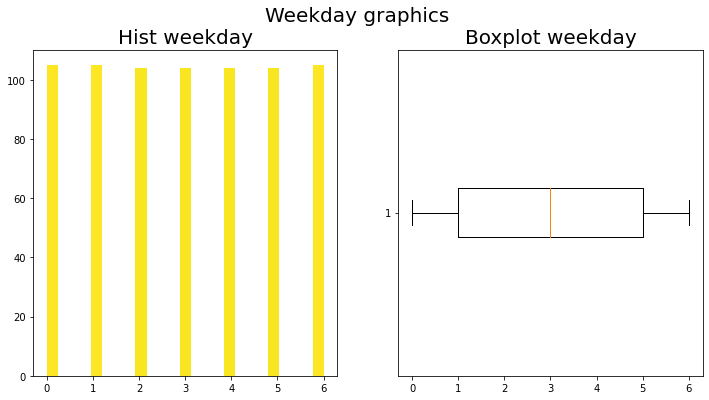

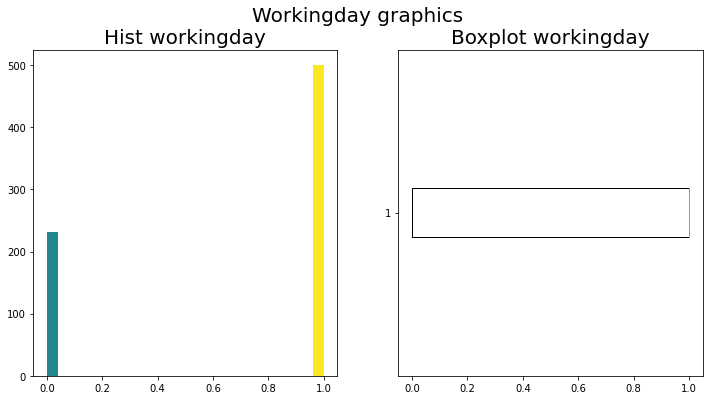

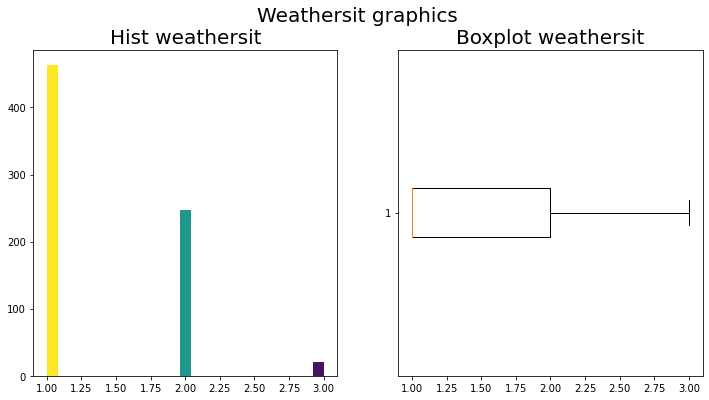

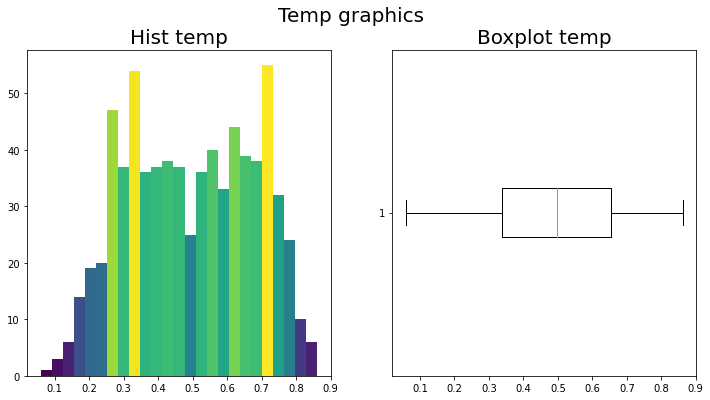

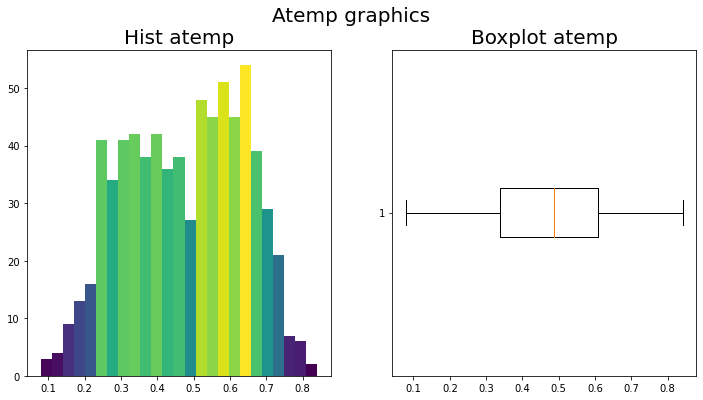

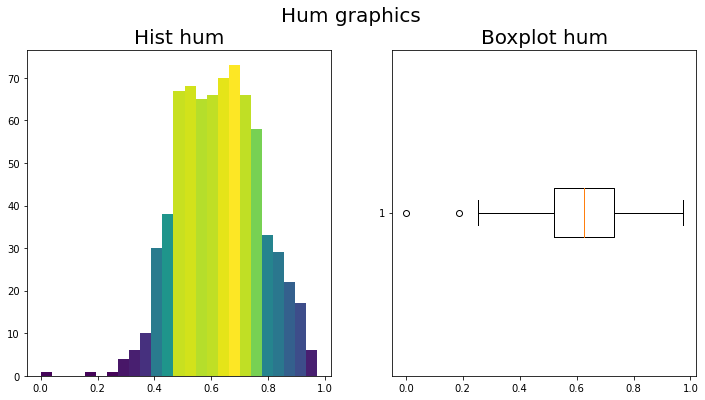

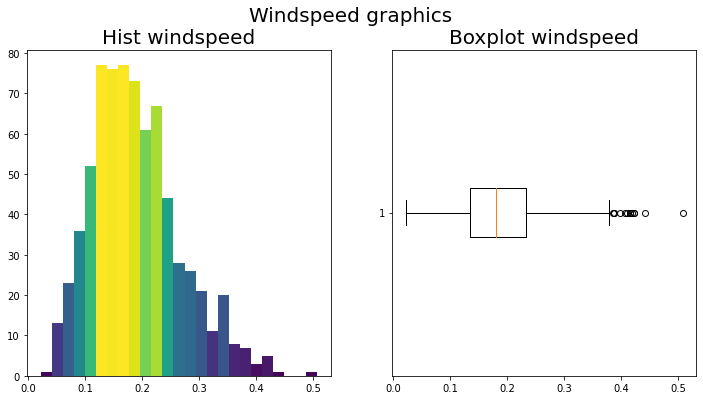

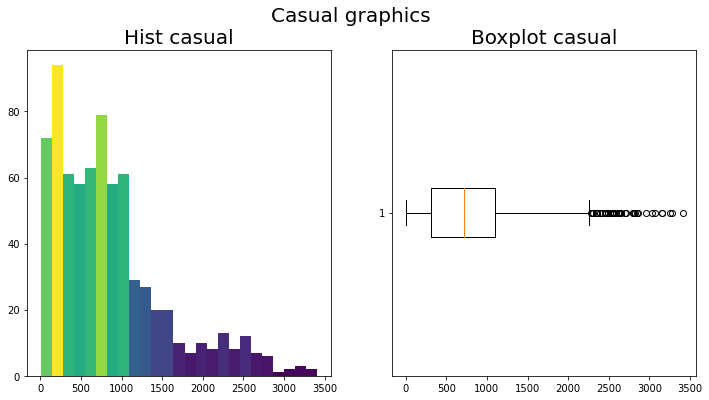

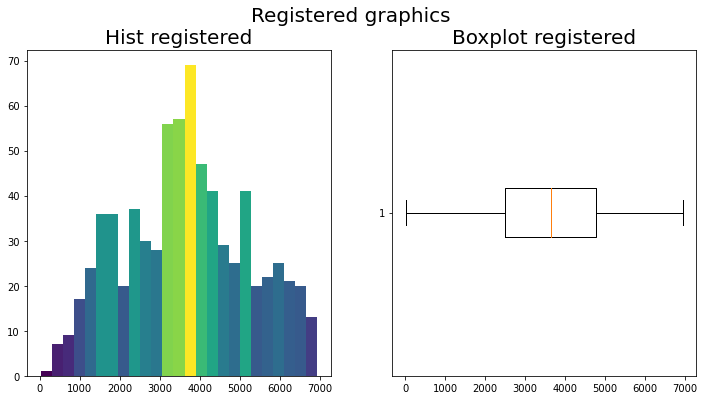

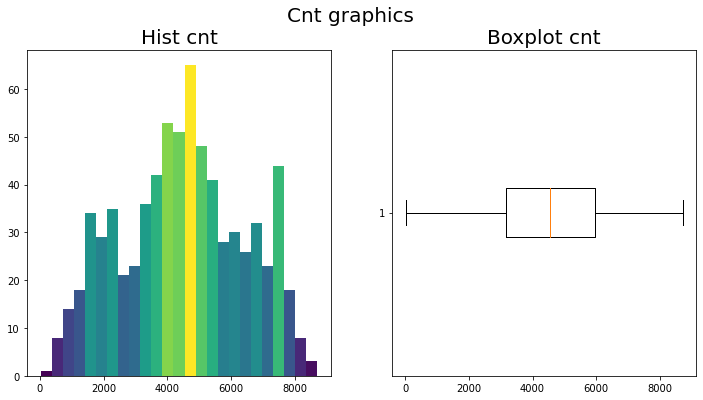

In [113]:
for name in columns:
    if name == 'dteday': continue
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    fig.suptitle(f'{name} graphics'.capitalize(), fontsize=20)
    n_bins = 25
    N, bins, patches = ax[0].hist(df[name], bins=n_bins)
    # ax[0].grid(True)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    ax[0].set_title(f'Hist {name}', fontsize=20)
    ax[1].boxplot(df[name], vert=False)
    ax[1].set_title(f'Boxplot {name}', fontsize=20)
    plt.show()

# Correlation Matrix

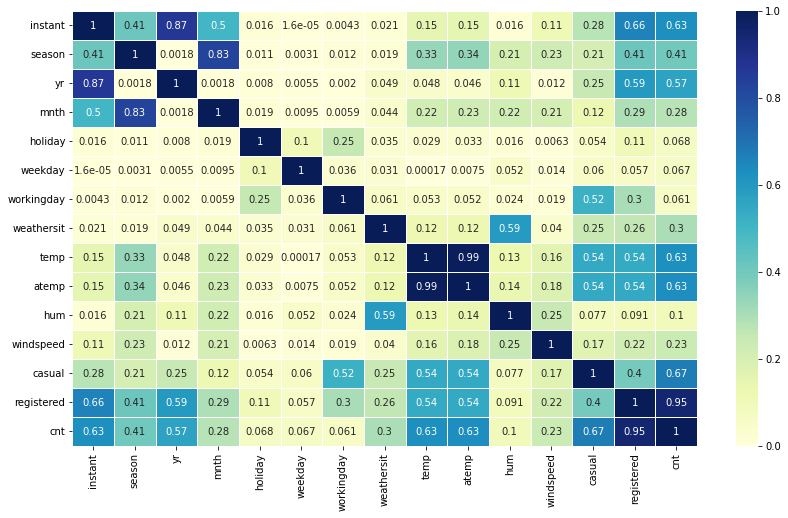

In [114]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sb.heatmap(abs_corr, annot=True, vmin=0, vmax=1, linewidths=.5, cmap="YlGnBu")
plt.show()

# Scatter cnt

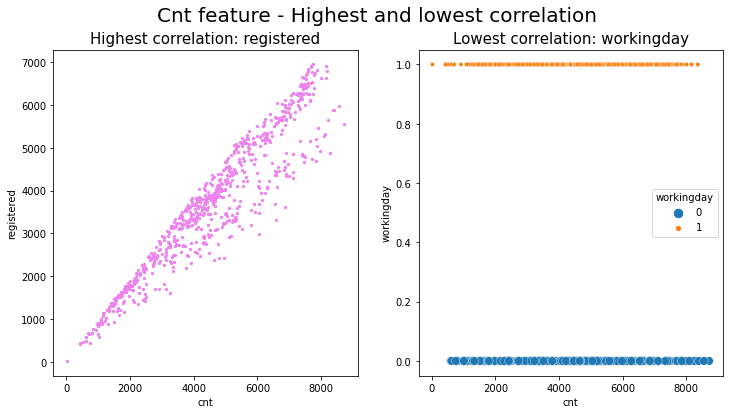

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
x, a, b = 'cnt', 'registered', 'workingday'
fig.suptitle('Cnt feature - Highest and lowest correlation', fontsize=20)
ax[0].scatter(df[x].values, df[a].values, color='violet', s=5)
ax[0].set_title(f'Highest correlation: {a}', fontsize=15)
ax[0].set_xlabel(x)
ax[0].set_ylabel(a)
ax[1] = sb.scatterplot(data=df, x=x,y=b, size=b, hue=b)
ax[1].set_title(f'Lowest correlation: {b}', fontsize=15)
plt.show()

# Scatter 4 features

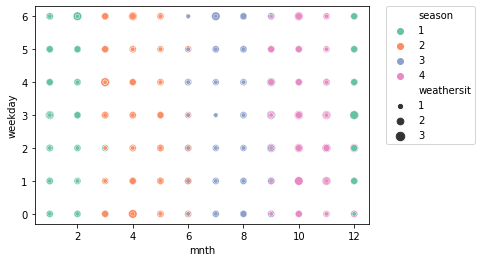

In [116]:
x,y,s,h = 'mnth','weekday','weathersit','season'
sb.scatterplot(data=df, x=x,y=y, size=s, hue=h, palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Insights

This graphic represents de distribution between the different records, the season, the number of registered people and the year where it was recorded.

As we can see, it was more people registered on the second year than the first, what says that the company has been catching more people trought the time.

We can see that in winter some people unsuscribe, or unregister, but then when spring starts registrations raises.

This is a constant in the two years this records had been taked.

<AxesSubplot:xlabel='instant', ylabel='registered'>

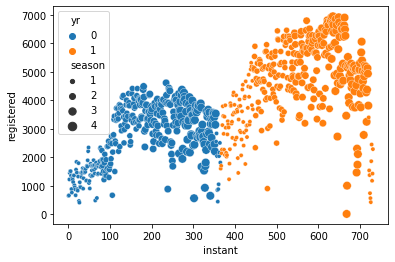

In [117]:
x,y,h,s = 'instant','registered', 'yr', 'season'
sb.scatterplot(data=df, x=x,y=y, hue=h, size=s)

This graphic explains the correlation between the temperature and the feeling temperature, and we can see that its basically a linear correlation. Each color help us to see which season we are, and as we can see each temperature values correspond to a particular season, as it agroups by some ranges of temperature.

Something interesting is that the coldest values are not on winter, but on spring, following for fall and summer. Its interesting as normally winter is the coldest station of year, but here coldest station was spring.

<AxesSubplot:xlabel='temp', ylabel='atemp'>

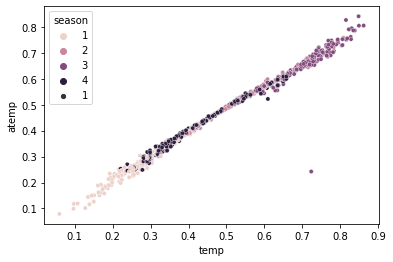

In [118]:
x,y,h = 'temp','atemp', 'season'
sb.scatterplot(data=df, x=x,y=y, hue=h, size=1)

This histogram show us the frecuency when the bikes where rented by month. As we can see, each month presents almost the same amount of rents, being February the month with less rents, but by a small margin. We can conclude that the month doesnt affect on if bikes will be rented or not.

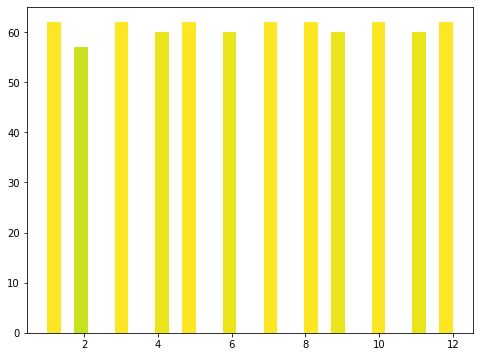

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
n_bins = 30
N, bins, patches = ax.hist(df['mnth'], bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

This scatter represents the distribution between the total count of rental bikes, and the number of egistered users.

As we can see, the more numbr of rental bikes, the more registered users there are. The correlation is following a linear relation.

That indicates that increasing the capacity on rental bikes will directly affect on how much users we are capting.

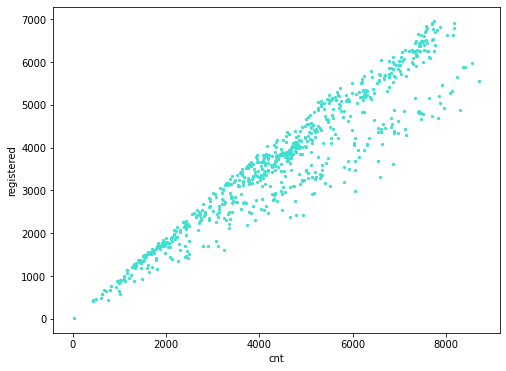

In [121]:
fig, ax = plt.subplots(figsize=(8,6))
x, y = 'cnt', 'registered'
ax.scatter(df[x].values, df[y].values, color='turquoise', s=5)
ax.set_xlabel(x)
ax.set_ylabel(y)
plt.show()